# **던전앤파이터 유저 및 패키지 매출 분석**

- todo : 파일 구조 수정으로 인해 수정 예정

## **개요**
* 던전앤파이터 신규 직업 아처, 비질란테 출시되면서 새로운 유저들이 유입되었다.
* 유저들을 분류하여 유저 풀 별 행동 패턴과 구매력을 분석한다.
  * 이벤트를 모두 참여하는 유저와 그렇지 않은 유저로 구분한다.
  * `퀘스트 클리어률을 바탕으로 육성 던전, 육성 지원 이벤트를 개선한다.`
* 신규 캐릭터 관련 패키지 매출을 통해서 `유저 풀에 따른 구매력을 확인한다.`
  * 이를 통해 `추후의 육성 지원 패키지와 이벤트를 개선한다.`

## 1. **신규 캐릭터와 관련된 이벤트 분석**

1. **사전 예약 이벤트**
    - `비질란테, 헌터의 아바타 및 이모티콘 지급`.
    - 신규 유저 및 이탈 유저를 불러오기 위해 `사전 예약 인원 당 쿠폰 2매 지급`

1. **닥터 오라클의 차원 왜곡 장치**
    - 이벤트 기간 내 꾸준히 플레이 시 `4유효 커스텀 장비 지급`
    - 적은 캐릭터를 키우는 유저들도 쉽게 `초월의 돌`획득 가능
    - 기존의 1잠금 큐브와 동등한 역할을 하는 차원 왜곡 장치로 인해 비교적 쉬운 난이도로 `4유효 커스텀 장비` 획득 가능
    - `매일 7회 분량의 차원 왜곡 장치 재료`와 `1회 분량의 차원 왜곡 장치 재료` 지급

1. **마일리지 샵 개선**
    - `초월의 돌을 계정 당 3개` 구매가 가능하다.
    - 꾸준히 플레이를 한다면 최소 1~2개 획득이 가능하다.
    - 신규 캐릭터 패키지를 구매한 경우 초월의 돌 3개를 쉽게 얻을 수 있다.
    
2. **신규 캐릭터 이벤트 지정**
    - `12강 무기 지급`
    - 어둑섬의 월간 퀘스트, 혹은 클리어 시 낮은 확률로 얻을 수 있는 `어둑섬 융합장비 지급`
    - `4유효 커스텀 장비 지급`
    - 이벤트 캐릭터 전용 상점에서 `다량의 부유석 지급`
    - `신규 캐릭터 전용 차원 왜곡 장치 재료 지급`

1. **싱그러운 봄날의 출석 체크**
    - `초월의 돌`

1. **PC방 이벤트**
    - 40시간 플레이 시 `시브 보주 지급`
    - 80시간 플레이 시 `요무무 보주 지급`
    - 100시간 플레이 시 `조화 큐브 지급`

### **요약**
* 5개의 초월의 돌을 지급하면서 기존 캐릭터 육성, 신규 캐릭터 육성 두 가지 선택지가 존재한다.
* 신규 캐릭터의 경우 다량의 부유석으로 빠르게 정제된 미스트 기어를 수급할 수 있다.
  * 정제된 미스트 기어와 총 3개의 오라클 큐브로 약 10부위 중 4부위를 완성시킬 수 있다.
* PC방 이벤트를 모두 참여 시, 3가지 종결 아이템을 얻을 수 있다.
* `기존 캐릭터, 신규 캐릭터가 모두 참여하기 좋은 이벤트로 구성되어있다.`
* 기존 유저들은 신규 캐릭터로 몰아주기 좋은 여건이 마련되어있고, 신규 유저들은 집중해서 하나의 캐릭터를 빠르게 완성하기 좋은 환경이다.

## **2. 퀘스트 클리어률 분석**

### **2-1. 유저 수 확인**
* 모든 유저가 헌터 또는 비질란테를 생성한 유저를 카운팅한다.
* 4/25 기준 active `유저는 종결 아이템으로 교환 가능한 오라클의 신비한 차원 결정`을 획득한 유저로 구분한다.

In [2]:
from configs.config import BASE_PATH
from collections import defaultdict as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\tbxkd\AppData\Local\Temp\ipykernel_9472\1622779030.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
path = os.path.join(BASE_PATH,r'data\crawling_data\data_20240425\신직업_adventure_titles.csv')
df = pd.read_csv(path)
df.head()

,sv_kor,sv_eng,cha_img_code,cha_name,job_name,lv,fame,cha_code,adventure,title
0,카인,cain,d2216d7ef92bf3f5d54dfec06ee0ebf8,신비,비질란테,110,61791,e2e8bf541707cc9423ea2db3e6e1e165,신비로운,흰 구름 감시대장[40Lv]
1,바칼,bakal,f320c5c2496747a3c9756b51945e13e4,쿠거폼,비질란테,110,61777,7f7c135dc45cfe6e08f638e678c41824,묘팸,흰 구름 감시대장[40Lv]
2,디레지에,diregie,a247d17c88be7244397e2c201cdf0a30,Pass집사,비질란테,110,61595,ee7482e08ec8cb3a2b491e31883f32cd,AradPass,흰 구름 감시대장[40Lv]
3,프레이,prey,9559d4078abc7aa1e2a48dbd473a21c0,헌Eㅓ,비질란테,110,61559,NaN,NaN,NaN
4,카시야스,casillas,8c9d1bdc2d8b17f015cb8b87e29c7b87,파인스,비질란테,110,61390,192fb1abefd596d76f81d2ccead16950,황예지,진정한 각성을 이룬 자 플래티넘[40Lv]


* 4/25 기준, 공식 홈페이지에서 캐릭터 정보를 `크롤링한 데이터를 바탕으로 유저 수를 파악한다.`
* 모험단을 기준으로 groupby를 한 후, 각 유저가 이벤트 조건을 만족했는지 조사한다.

In [4]:
# 모험단으로 group by를 해서 각 유저가 신규 직업을 얼마나 육성했는지 체크한다.
population = df.groupby('adventure').size().reset_index(name='number of characters')
population.sort_values('number of characters', ascending=False, inplace=True)
population

,adventure,number of characters
63911,외인,12
90174,흰색아기사자,6
52996,술법,5
83596,편월,5
6229,LHGUA,4
...,...,...
20508,귀찮으면접안함,1
61341,여명참치,1
61339,여명의화원,1
61334,여명의빛,1


* 신규 직업 중, 한 캐릭터만 생성한 사람부터 12개까지 키운 사람까지 존재한다.


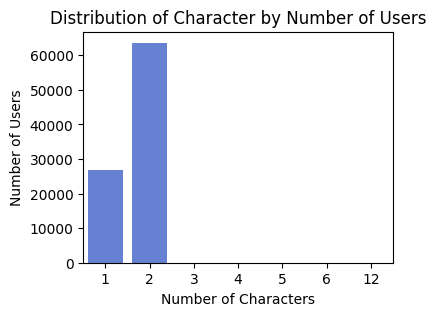

In [5]:
# 유저 별 신규 캐릭터 육성 현황을 bar chart로 나타낸다.
fig,ax = plt.subplots(figsize=(4,3))
distribution = population['number of characters'].value_counts()
sns.barplot(data=distribution, color = 'royalblue', alpha=0.9, ax=ax)
plt.xlabel('Number of Characters')
plt.ylabel('Number of Users')
plt.title('Distribution of Character by Number of Users')
plt.show()

### **요약**
* 분포를 확인해보면 대부분 1개 또는 2개의 캐릭터를 키운 것을 확인할 수 있다.
  * 3개 이상의 캐릭터를 키운 유저의 경우에 대부분 같은 캐릭터를 여러 개 생성한 것을 확인했다.
  
* 던전앤파이터 예상 인구는 약 `9만명~10만명`이다.
  * 캐릭터 코드가 등록되지 않은 인구 `0.11만명`이다.
  * 신규 캐릭터를 하나라도 육성한 유저는 `9.04만명`이다.
  * 신규 캐릭터를 키우지 않는 유저를 제외포함하면 약 `9.15만명`이다.
  * 이스핀즈 명성(33043) 이하의 명성을 가진 캐릭터들을 절사한 것, 신규 유저들의 이탈을 고려하면 약 `9만명 이하`정도이다.
  
* 신규 캐릭터를 모두 육성한 유저의 비율이 약 `70%`이다.
  * 이벤트 기간 중, 다량의 초월의 돌을 쉽게 얻을 수 있던 것에 비해서 참여율이 낮다.
  * 각 캐릭터당 3시간 정도면 빠르게 도달할 수 있는 것에 반해서 저조한 참여율이라 생각한다.
  * `신규/복귀 유저들의 경우, 강제로 아처 직업군을 베이스로 시작해야 한다는 점이 영향`을 끼쳤다고 생각한다.
  * `기존 유저의 경우`, 클론 레어 아바타, 신규 크리쳐, 오라 등 `필수적인 부분들에서 지원받지 못하기 때문에 기존 캐릭터를 육성`한 것으로 보인다.

### **2-2. 이벤트 참여율 확인**

* 각 유저가 목표 명성치를 도달했는지 확인한다.
  * 각 유저가 육성한 비질란테, 헌터의 최대 명성값을 찾고 카운팅한다.

In [6]:
# 모험단 별로, 비질란테와 헌터의 명성 최댓값을 찾아 이벤트 참여를 했는지 확인한다.
participation_fame = df.groupby(by = ['adventure','job_name'])['fame'].max().reset_index(name='max_fame')
participation_fame

,adventure,job_name,max_fame
0,0000AM,비질란테,39106
1,0000AM,헌터,37809
2,0000모험단,헌터,47152
3,0000이름없음0000,비질란테,43933
4,0000이름없음0000,헌터,44543
...,...,...,...
154144,힝힝나만운엄서,비질란테,52720
154145,힝힝나만운엄서,헌터,41330
154146,힡,비질란테,49776
154147,힣뀨,비질란테,40679


In [7]:
# 모험단 : [비질란테 최대 명성, 헌터 최대 명성, 캐릭터 수, 이벤트  참여 캐릭터 수]
adventures = dd(lambda : [0]*4)

for idx,row in participation_fame.iterrows():
    job,fame = row['job_name'], row['max_fame']
    index = (job=='헌터')
    adventures[row['adventure']][index] = row['max_fame']
    adventures[row['adventure']][2] += 1
    if fame >= 40047:
        adventures[row['adventure']][3] += 1

# 각 모험단 별 이벤트 처리
participation = pd.DataFrame(adventures).T
participation.rename(columns={0:'비질란테 명성', 1:'헌터 명성', 2:'이벤트 참여 캐릭터',3:'오라클 큐브 획득'}, inplace = True)
participation

,비질란테 명성,헌터 명성,이벤트 참여 캐릭터,오라클 큐브 획득
0000AM,39106,37809,2,0
0000모험단,0,47152,1,1
0000이름없음0000,43933,44543,2,2
0001,54314,56174,2,2
000411,51420,50741,2,2
...,...,...,...,...
힝입니당,57441,58462,2,2
힝핑풍팽,52591,50715,2,2
힝힝나만운엄서,52720,41330,2,2
힡,49776,0,1,1


In [8]:
# 이벤트 참여 캐릭터 개수에 따라서 명서
participation_rate = participation.groupby(by=['이벤트 참여 캐릭터','오라클 큐브 획득']).size().reset_index(name='count')
participation_rate['rate'] = participation_rate['count']/len(participation)
participation_rate

,이벤트 참여 캐릭터,오라클 큐브 획득,count,rate
0,1,0,7059,0.078022
1,1,1,19742,0.218204
2,2,0,3412,0.037712
3,2,1,8329,0.092059
4,2,2,51933,0.574004


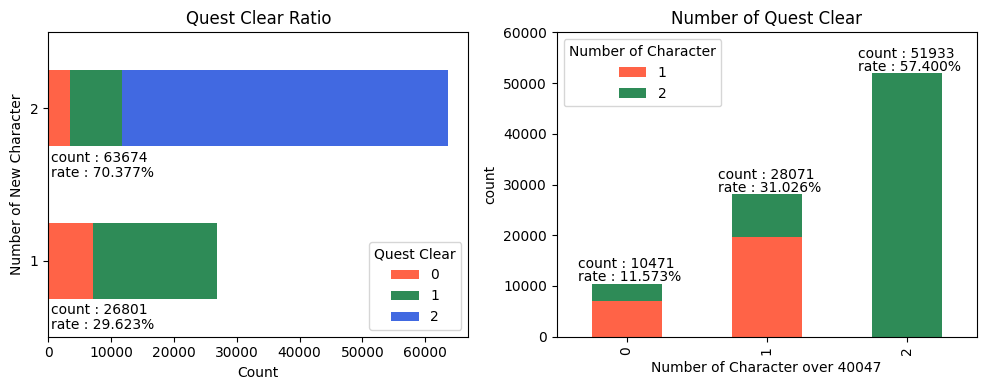

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))


# 신규 캐릭터 수에 따른 퀘스트 클리어 수
participation.groupby(['이벤트 참여 캐릭터', '오라클 큐브 획득'])['이벤트 참여 캐릭터'].size().unstack('오라클 큐브 획득').plot(ax=axes[0], kind='barh', stacked=True,
                                                                                              color=['tomato', 'seagreen','royalblue'])

for i in range(1,3):
    axes[0].text(y=i-1.35, x=500, s=f'count : {sum(participation_rate[participation_rate['이벤트 참여 캐릭터']==i]['count'])}')
    axes[0].text(y=i-1.45, x=500, s=f'rate : {sum(participation_rate[participation_rate["이벤트 참여 캐릭터"]==i]["rate"])*100:.3f}%')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Number of New Character')
axes[0].set_title('Quest Clear Ratio')
axes[0].legend(title='Quest Clear')

# 오라클 큐브를 획득한 유저 별 퀘스트 클리어 수
participation_rate.groupby(['오라클 큐브 획득', '이벤트 참여 캐릭터'])['count'].sum().unstack('이벤트 참여 캐릭터').plot(ax=axes[1], kind='bar', stacked=True,
                                                                                           color=['tomato', 'seagreen','royalblue'])
for i in range(3):
    axes[1].text(x=i-0.35,y=3000+sum(participation_rate[participation_rate['오라클 큐브 획득']==i]['count']),
                 s=f'count : {sum(participation_rate[participation_rate['오라클 큐브 획득']==i]['count']):5}')
    axes[1].text(x=i-0.35,y=500+sum(participation_rate[participation_rate['오라클 큐브 획득']==i]['count']),
                 s=f'rate : {sum(participation_rate[participation_rate['오라클 큐브 획득']==i]['count'])*100/sum(participation_rate['count']):.3f}%')
axes[1].set_xlabel('Number of Character over 40047')
axes[1].set_ylabel('count')
axes[1].set_ylim(0,60000)
axes[1].set_title('Number of Quest Clear')
axes[1].legend(title='Number of Character')


plt.tight_layout()
plt.show()

* 헌터와 비질란테 모두 키운 유저는 `70.4%`, 하나만 키운 유저는 `29.6%`이다.
* `두 직업군 모두 키운 유저의 80% 이상인 57.4%의 유저가 목표 명성을 달성`했다.

### **요약 및 개선사항**

#### **퀘스트 클리어율 분석**
* 전체 유저 57%의 유저만 두 신규 직업을 모두 육성하여 퀘스트에 완료하였다.
* 매력적인 이벤트임에도 불구하고 43%의 유저들이 두 캐릭터 모두 육성하지 않았다.
* 나머지 31%는 하나의 퀘스트를 완료했고 나머지 11%의 유저는 퀘스트를 클리어하지 않았다.

#### **낮은 클리어율의 원인**
1. **자신의 플레이 스타일과 맞는 캐릭터인지 확인하기 어려움**
   * 기존 수련의 방은 굉장히 `느린 환경에서 플레이를 하기 때문에 캐릭터의 매력을 충분히 느끼기 어렵다.`
   * 신규 캐릭터인 만큼 연계나 콤보에 대한 정보가 없는데, `제작자의 의도에 맞게 다양한 콤보를 제공하고 연습할 수 있는 수련의 방 환경 개선이 필요하다.`
   * 또한, 현재 제공하고 있는 `모의전투 시스템을 수련의 방에 추가하여 실전 전투 경험을 제공`해야한다.
  
2. **기존 캐릭터와 다른 느린 환경에서의 육성**
   * 대부분의 유저들은 `장비와 아바타가 충분히 주어지지 않은 환경에서 육성한다.`
   * 이를 해결하기 위해 데미지 물약과 비슷한 방식으로 `속도 물약을 지급`하면 이탈 유저를 방지할 수 있으리라 예상된다.

## **3. 매출 분석을 위한 유저 클러스터링**


### **1. 시계열 데이터 구축**
* 4/2 ~ 4/25일의 신규 캐릭터 데이터를 이용해서 명성 시계열 데이터를 구축한다.

In [10]:
# 웹 크롤링한 데이터를 바탕으로 시계열 데이터를 구축한다.
path = os.path.join(BASE_PATH,r'data\crawling_data\data_20240425\신직업_adventure_titles.csv')
df = pd.read_csv(path)
infos = df[['sv_eng','cha_name','title','fame']][~df['cha_code'].isnull()]
infos.rename(columns={'fame':'0425'}, inplace=True)
infos

,sv_eng,cha_name,title,0425
0,cain,신비,흰 구름 감시대장[40Lv],61791
1,bakal,쿠거폼,흰 구름 감시대장[40Lv],61777
2,diregie,Pass집사,흰 구름 감시대장[40Lv],61595
4,casillas,파인스,진정한 각성을 이룬 자 플래티넘[40Lv],61390
5,prey,겨울빛눈송이,진정한 각성을 이룬 자 플래티넘[40Lv],61095
...,...,...,...,...
155409,cain,-Huntress-,[EVENT]세리아의 풍성한 선물 Ver.2,33045
155410,cain,시골청년1호,세리아의 환영 (30일),33044
155411,cain,캐헌터,세리아의 환영 (30일),33044
155412,cain,ㆎㆍ¡,로얄 패스 칭호[기간제],33044


In [11]:
file_path = os.path.join(BASE_PATH,'data','crawling_data')
time_columns = ['04'+str(day).zfill(2) for day in range(24,1,-1) if day not in (12,13)]

# 기존 테이블에 이전 날짜들의 명성을 통합
for day in time_columns:
    path1 = os.path.join(file_path,'data_2024'+day)
    temp = pd.DataFrame()
    
    # 날짜별 신규 직업 테이블 통합
    for job in ('비질란테.csv','헌터.csv'):
        path2 = os.path.join(path1,job)
        job_table =  pd.read_csv(path2)
        temp = pd.concat([temp, job_table[['sv_eng','cha_name','fame']]])
    
    # JOIN : 기본키인 서버/캐릭터명으로 조인
    infos = pd.merge(infos,temp, on=['sv_eng','cha_name'], how='left')
    infos.rename(columns={'fame':day}, inplace=True)
infos.head()

,sv_eng,cha_name,title,0425,0424,0423,0422,0421,0420,0419,...,0411,0410,0409,0408,0407,0406,0405,0404,0403,0402
0,cain,신비,흰 구름 감시대장[40Lv],61791,61791.0,61791.0,61791.0,61791.0,61791.0,61441.0,...,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0
1,bakal,쿠거폼,흰 구름 감시대장[40Lv],61777,61777.0,61777.0,61777.0,61777.0,61777.0,61777.0,...,61477.0,61477.0,61477.0,61477.0,61477.0,61477.0,61177.0,61177.0,61177.0,61177.0
2,diregie,Pass집사,흰 구름 감시대장[40Lv],61595,61595.0,61595.0,61595.0,61595.0,61595.0,61595.0,...,61595.0,61595.0,61595.0,61595.0,61595.0,61595.0,60995.0,60995.0,60995.0,60895.0
3,casillas,파인스,진정한 각성을 이룬 자 플래티넘[40Lv],61390,61390.0,61390.0,61390.0,61390.0,61390.0,61390.0,...,61390.0,61390.0,61390.0,61349.0,61349.0,61349.0,61349.0,61349.0,61349.0,61349.0
4,prey,겨울빛눈송이,진정한 각성을 이룬 자 플래티넘[40Lv],61095,61095.0,61095.0,61095.0,61095.0,61095.0,61095.0,...,60745.0,60745.0,60702.0,60702.0,60688.0,60688.0,60688.0,60688.0,60688.0,60688.0


### **2. 데이터 전처리**
* 명성 데이터만 불러온 후, `날짜 순으로 오름차순하여 시계열 데이터`로 만들어준다.
* 클러스터링 이후 어떤 군집에 속하는지 확인하기 위해 `인덱스를 부여`한다.
* `캐릭터가 생성되지 않은 시점의 명성치는 0으로 설정한다.`

In [12]:
# 시계열 데이터 만들기
time_columns = list(infos.columns)
time_columns.sort()
time_columns = time_columns[:-3]
time_series = infos[time_columns]
time_series

,0402,0403,0404,0405,0406,0407,0408,0409,0410,0411,...,0416,0417,0418,0419,0420,0421,0422,0423,0424,0425
0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,60577.0,...,61441.0,61441.0,61441.0,61441.0,61791.0,61791.0,61791.0,61791.0,61791.0,61791
1,61177.0,61177.0,61177.0,61177.0,61477.0,61477.0,61477.0,61477.0,61477.0,61477.0,...,61777.0,61777.0,61777.0,61777.0,61777.0,61777.0,61777.0,61777.0,61777.0,61777
2,60895.0,60995.0,60995.0,60995.0,61595.0,61595.0,61595.0,61595.0,61595.0,61595.0,...,61595.0,61595.0,61595.0,61595.0,61595.0,61595.0,61595.0,61595.0,61595.0,61595
3,61349.0,61349.0,61349.0,61349.0,61349.0,61349.0,61349.0,61390.0,61390.0,61390.0,...,61390.0,61390.0,61390.0,61390.0,61390.0,61390.0,61390.0,61390.0,61390.0,61390
4,60688.0,60688.0,60688.0,60688.0,60688.0,60688.0,60702.0,60702.0,60745.0,60745.0,...,61095.0,61095.0,61095.0,61095.0,61095.0,61095.0,61095.0,61095.0,61095.0,61095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154301,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,...,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,33045.0,33045
154302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,33044.0,33044.0,33044.0,33044.0,33044.0,33044
154303,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,...,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044
154304,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,...,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044.0,33044


In [13]:
# NULL값 처리, 자료형 처리
time_series.fillna({day:0 for day in time_columns}, inplace=True)
time_series = time_series.astype(int)
time_series

C:\Users\tbxkd\AppData\Local\Temp\ipykernel_9472\3533892628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series.fillna({day:0 for day in time_columns}, inplace=True)


,0402,0403,0404,0405,0406,0407,0408,0409,0410,0411,...,0416,0417,0418,0419,0420,0421,0422,0423,0424,0425
0,60577,60577,60577,60577,60577,60577,60577,60577,60577,60577,...,61441,61441,61441,61441,61791,61791,61791,61791,61791,61791
1,61177,61177,61177,61177,61477,61477,61477,61477,61477,61477,...,61777,61777,61777,61777,61777,61777,61777,61777,61777,61777
2,60895,60995,60995,60995,61595,61595,61595,61595,61595,61595,...,61595,61595,61595,61595,61595,61595,61595,61595,61595,61595
3,61349,61349,61349,61349,61349,61349,61349,61390,61390,61390,...,61390,61390,61390,61390,61390,61390,61390,61390,61390,61390
4,60688,60688,60688,60688,60688,60688,60702,60702,60745,60745,...,61095,61095,61095,61095,61095,61095,61095,61095,61095,61095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154301,33045,33045,33045,33045,33045,33045,33045,33045,33045,33045,...,33045,33045,33045,33045,33045,33045,33045,33045,33045,33045
154302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,33044,33044,33044,33044,33044,33044
154303,33044,33044,33044,33044,33044,33044,33044,33044,33044,33044,...,33044,33044,33044,33044,33044,33044,33044,33044,33044,33044
154304,33044,33044,33044,33044,33044,33044,33044,33044,33044,33044,...,33044,33044,33044,33044,33044,33044,33044,33044,33044,33044


### **3. EDA**
* 날짜 별 명성 데이터를 히스토그램과 히트맵으로 분포 확인

Text(0, 0.5, 'Number of Characters')

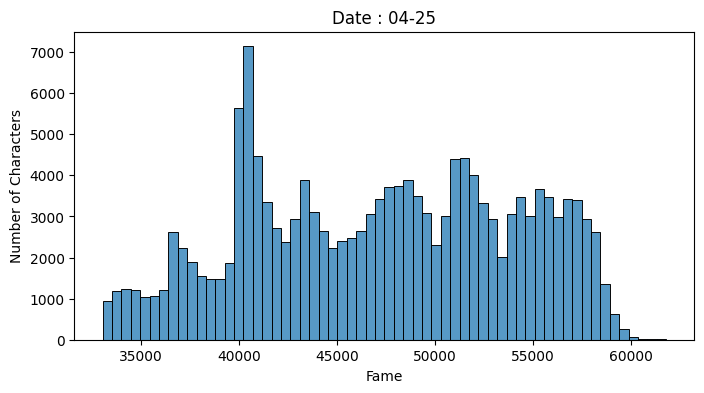

In [14]:
# 마지막 날짜인 04/25 샘플 히스토그램
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(time_series['0425'][(time_series['0425'] >= 33043)], ax=ax, bins=60)
plt.title('Date : 04-25')
plt.xlabel('Fame')
plt.ylabel('Number of Characters')

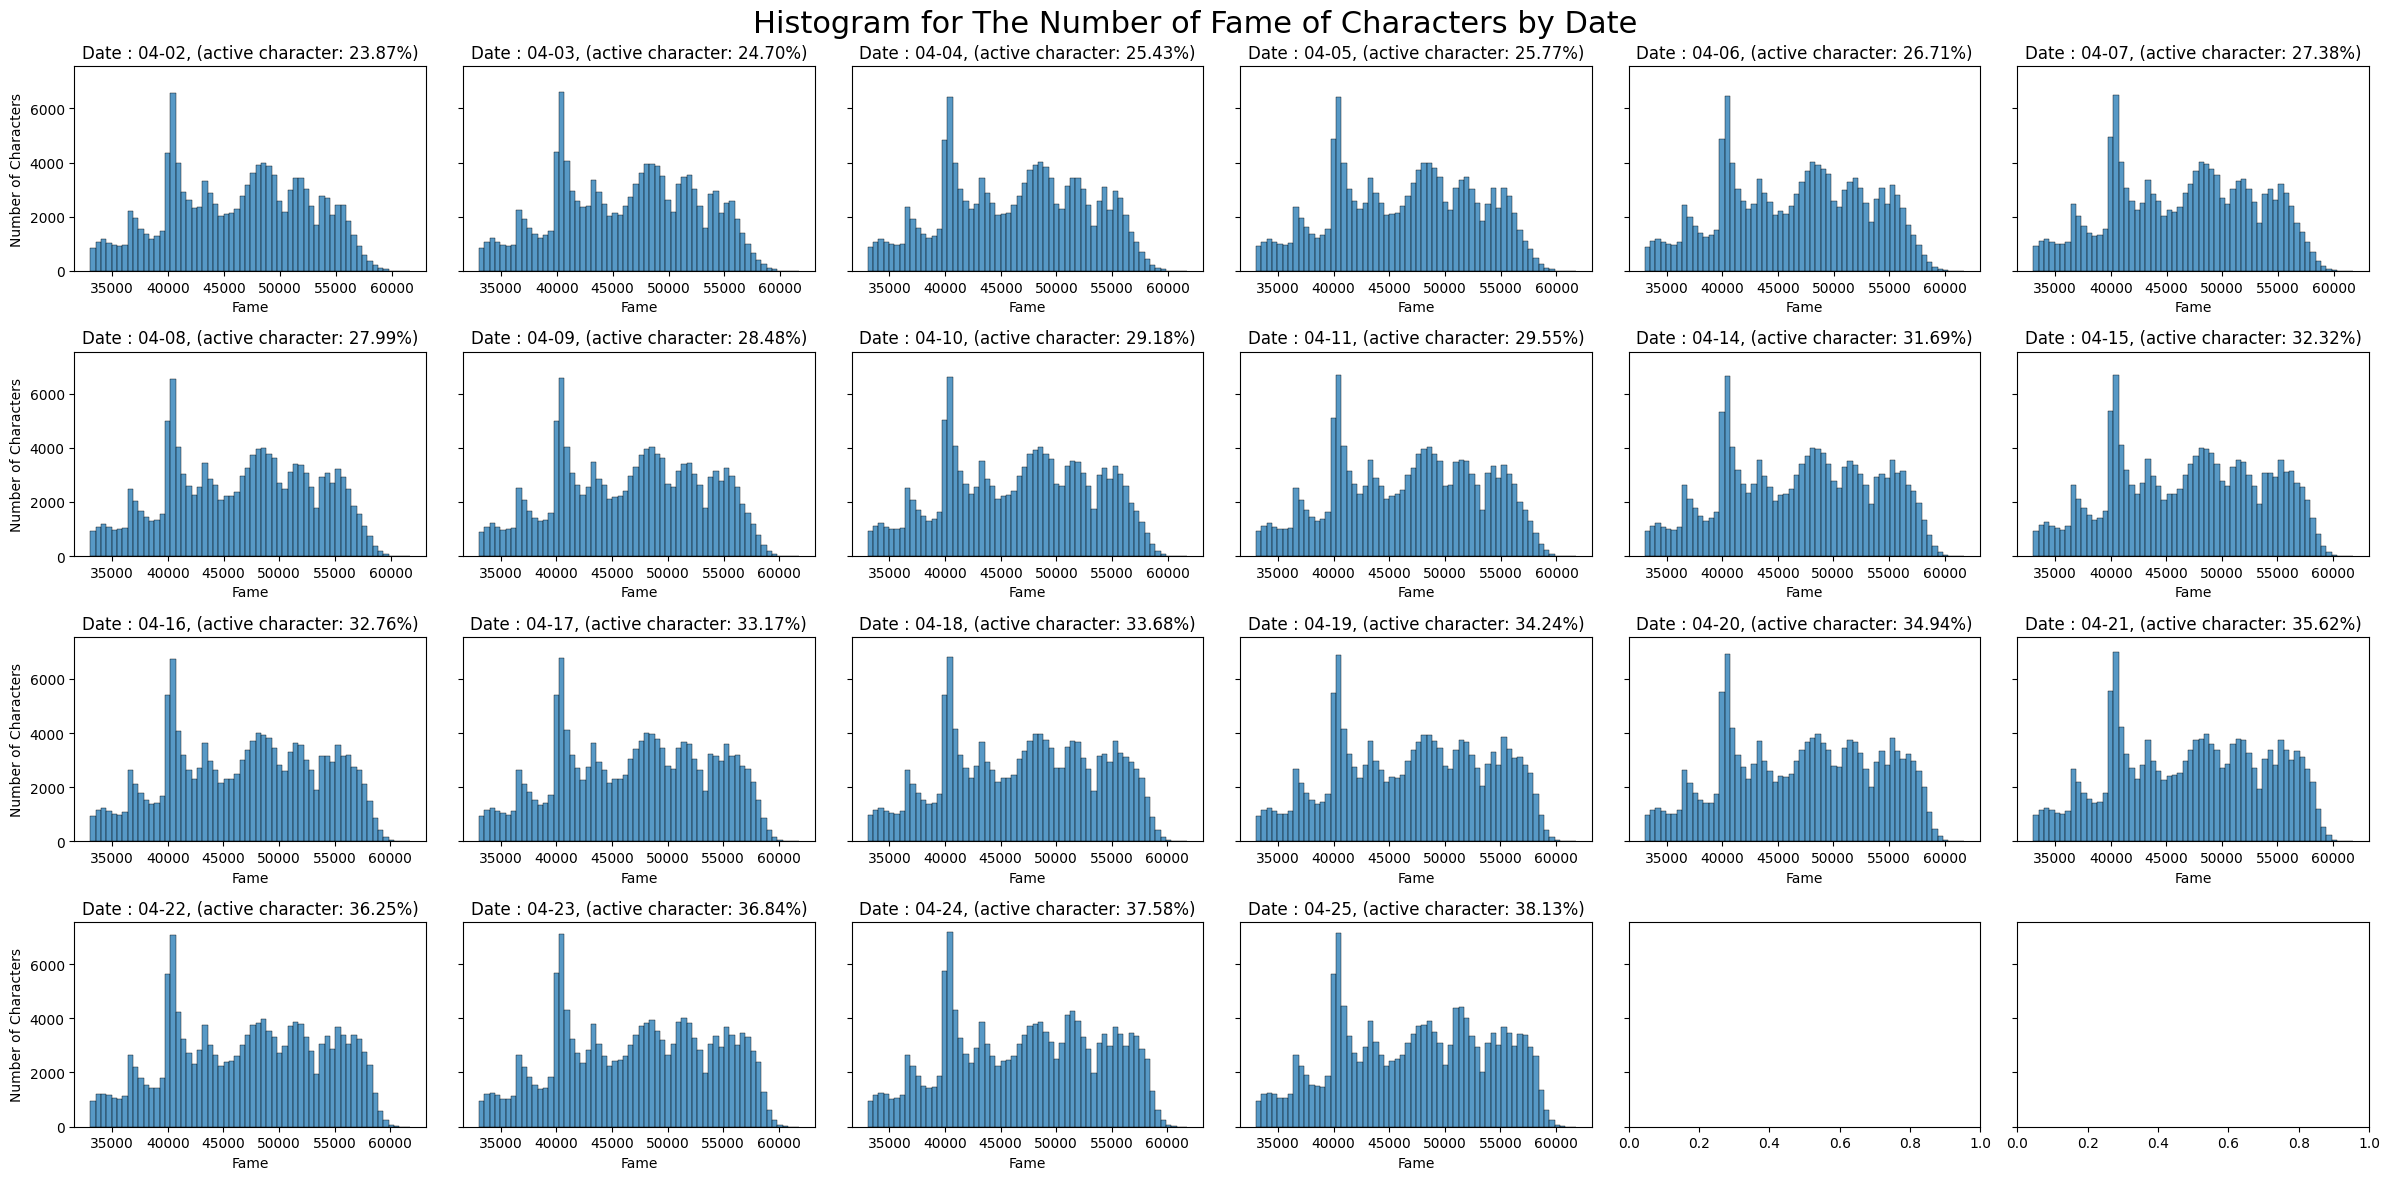

In [15]:
fig,axes = plt.subplots(4,6, figsize=(24,12), sharey=True)
h,w = time_series.shape
# 각 날짜별 히스토그램 생성
for day,ax in zip(time_columns, axes.flatten()):
    sns.histplot(time_series[day][(time_series[day] >= 33043)], ax=ax, bins=60)
    ax.set_title(f'Date : {day[:2]}-{day[2:]}, (active character: {100*len(time_series[time_series[day]>=50248])/h:.2f}%)')
    ax.set_xlabel('Fame')
    ax.set_ylabel('Number of Characters')
plt.suptitle('Histogram for The Number of Fame of Characters by Date', fontsize=22)
plt.tight_layout()
plt.show()

* 5.0 이하의 명성에서는 작년부터 문제가 됐던 차원회랑 이전인 3.8, 바칼 레이드 진입 이후인 4.3, 하드 바칼 레이드 진입 이후인 4.8 부근에 많은 유저가 분포한다.
  * 아처 성장지원 이벤트 이후, `성장지원 이벤트 커트라인을 어둑섬 명성으로 잡고있는 만큼 비어있는 구간을 빠르게 채울 수 있게 성장지원 이벤트를 개선`해야한다.
  * 특히 철 지난 컨텐츠인 `바칼 레이드의 경우 신규 캐릭터로 쩔을 받지 않으면 파티가 거의 불가능`하므로 빠르게 5.0~5.15에 도달할 수 있도록 개선해야한다.
* 전체적인 차트는 작년 말의 명성 분포와 비교했을 때, 중간 다리 역할을 하는 컨텐츠가 많아졌기 때문에 전반적으로 고르게 분포하고 있다.

In [16]:
# 히트맵으로 변경시키기 위해 명성을 1000단위로 끊어서 그루핑한다.
time_series_group = pd.DataFrame()
for day in time_series:
    time_series_group[day] = time_series[day]//1000
time_series_group

,0402,0403,0404,0405,0406,0407,0408,0409,0410,0411,...,0416,0417,0418,0419,0420,0421,0422,0423,0424,0425
0,60,60,60,60,60,60,60,60,60,60,...,61,61,61,61,61,61,61,61,61,61
1,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2,60,60,60,60,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
3,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
4,60,60,60,60,60,60,60,60,60,60,...,61,61,61,61,61,61,61,61,61,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154301,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
154302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,33,33,33,33,33,33
154303,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
154304,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


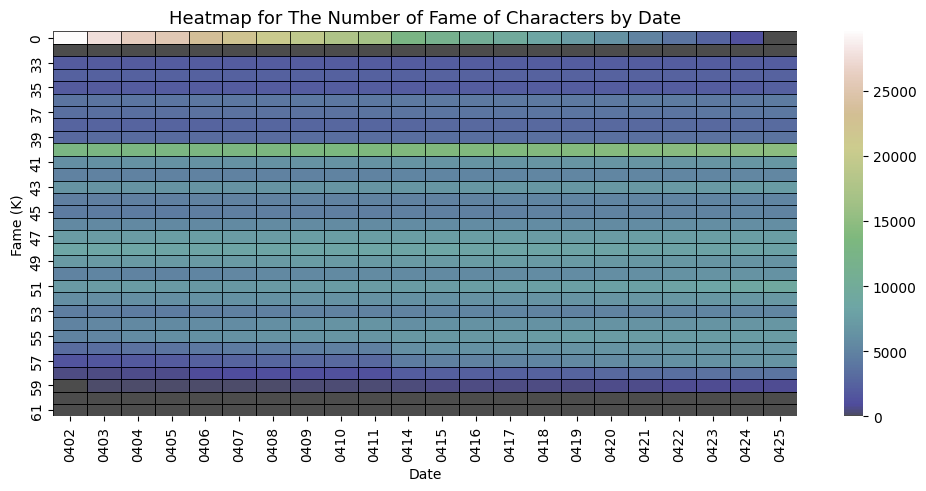

In [17]:
# 개수를 센 후 피벗 테이블로 변경해 히트맵 생성
pivot_table = time_series_group.apply(pd.Series.value_counts)
pivot_table.fillna(0, inplace=True)
fig,ax = plt.subplots(figsize=(12,5))
sns.heatmap(pivot_table, cmap='gist_earth', alpha=0.7, linewidths=0.5, linecolor='black', fmt='g', ax=ax)
ax.set_title('Heatmap for The Number of Fame of Characters by Date',fontsize=13)
ax.set_xlabel('Date')
ax.set_ylabel('Fame (K)')
plt.show()

Text(0.5, 1.0, 'Box Plot for Fame of Characters by Date')

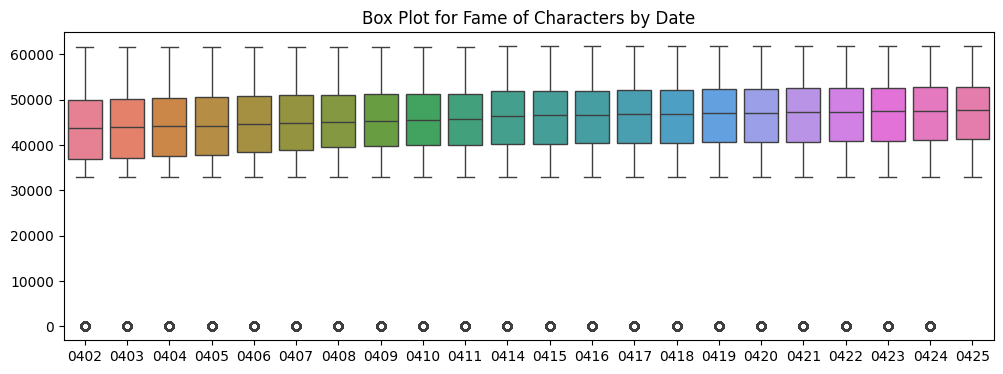

In [18]:
time_columns.sort()
fig,ax = plt.subplots(figsize=(12,4))
sns.boxplot(data=time_series[time_columns], ax=ax)
ax.set_title('Box Plot for Fame of Characters by Date')

* 4.0, 4.3, 4.8 등의 구간에서 정체가 일어난다.
* 최상위권의 경우, 초월 등을 통해서 빠르게 성장을 마친 것으로 보인다.
* 또한, 오라클 큐브 획득 마지노선인 4.0의 수는 거의 변하지 않았다.
  * `금전적 여유, 시간적 여유가 부족한 사람들은 캐릭터 성능, 매력과는 별개로 지속적으로 키우지 않겠다는 생각을 미리 한 것으로 보인다.`

### **4. 패키지 구매 유저 분류**

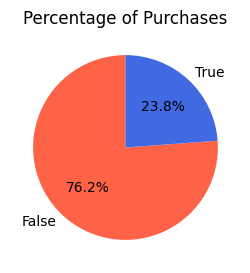

구매 캐릭터 수 : 36,707캐릭터
구매 비율 : 23.83%
매출액 : 1,090,197,900원


In [19]:
# 패키지 구성 요소 중 하나인 플래티넘 칭호를 통해서 구매율을 확인한다.
pattern = r'진정한 각성을 이룬 자 플래티넘'
buy_title = infos[['sv_eng','cha_name','title','0402','0425']]
buy_title = buy_title[~buy_title['title'].isnull()]
buy_title['buy'] = buy_title['title'].str.contains(pattern)

h,_ = buy_title.shape
h_buy,_ = buy_title[buy_title['buy']==True].shape

# pie chart
buy_counts = buy_title['buy'].value_counts()
fig, ax = plt.subplots(figsize=(3,3))
ax.pie(buy_counts, labels=buy_counts.index, autopct='%1.1f%%', startangle=90, colors=['tomato','royalblue'])
ax.set_title('Percentage of Purchases')
plt.show()

print(f'구매 캐릭터 수 : {h_buy:,}캐릭터')
print(f'구매 비율 : {100*h_buy/h:.2f}%')
print(f'매출액 : {29700*h_buy:,}원')

In [20]:
# NULL, 자료형 처리
infos.fillna({day:0 for day in time_columns}, inplace=True)
infos[time_columns] = infos[time_columns].map(int)
infos['purchase'] = infos['title'].str.contains('진정한 각성을 이룬 자 플래티넘')
infos.fillna({'purchase':False}, inplace=True)
infos['delta_fame'] = infos['0425']-infos['0402']
infos

,sv_eng,cha_name,title,0425,0424,0423,0422,0421,0420,0419,...,0409,0408,0407,0406,0405,0404,0403,0402,purchase,delta_fame
0,cain,신비,흰 구름 감시대장[40Lv],61791,61791,61791,61791,61791,61791,61441,...,60577,60577,60577,60577,60577,60577,60577,60577,False,1214
1,bakal,쿠거폼,흰 구름 감시대장[40Lv],61777,61777,61777,61777,61777,61777,61777,...,61477,61477,61477,61477,61177,61177,61177,61177,False,600
2,diregie,Pass집사,흰 구름 감시대장[40Lv],61595,61595,61595,61595,61595,61595,61595,...,61595,61595,61595,61595,60995,60995,60995,60895,False,700
3,casillas,파인스,진정한 각성을 이룬 자 플래티넘[40Lv],61390,61390,61390,61390,61390,61390,61390,...,61390,61349,61349,61349,61349,61349,61349,61349,True,41
4,prey,겨울빛눈송이,진정한 각성을 이룬 자 플래티넘[40Lv],61095,61095,61095,61095,61095,61095,61095,...,60702,60702,60688,60688,60688,60688,60688,60688,True,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154301,cain,-Huntress-,[EVENT]세리아의 풍성한 선물 Ver.2,33045,33045,33045,33045,33045,33045,33045,...,33045,33045,33045,33045,33045,33045,33045,33045,False,0
154302,cain,시골청년1호,세리아의 환영 (30일),33044,33044,33044,33044,33044,33044,0,...,0,0,0,0,0,0,0,0,False,33044
154303,cain,캐헌터,세리아의 환영 (30일),33044,33044,33044,33044,33044,33044,33044,...,33044,33044,33044,33044,33044,33044,33044,33044,False,0
154304,cain,ㆎㆍ¡,로얄 패스 칭호[기간제],33044,33044,33044,33044,33044,33044,33044,...,33044,33044,33044,33044,33044,33044,33044,33044,False,0


Text(0.5, 0.98, 'Hexbin Plot for Purchased Cases')

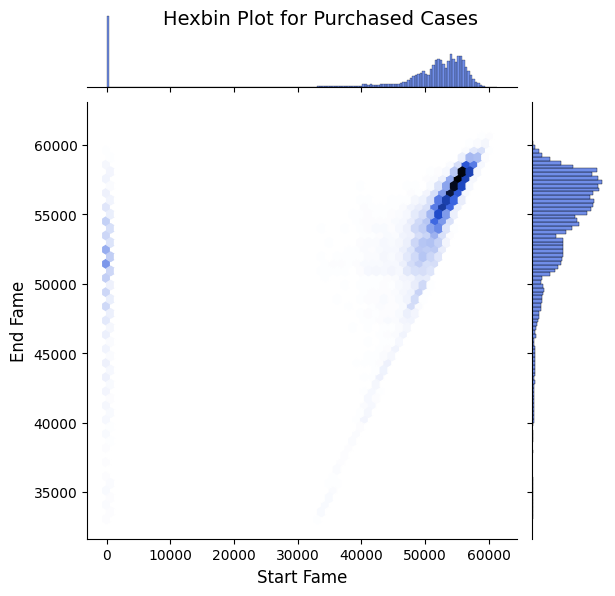

In [21]:
# 패키지 구매o
purchase_true = infos[infos['purchase'] == True]
purchase_true_hexbin = sns.jointplot(x=purchase_true['0402'], y=purchase_true['0425'], kind='hex', color='royalblue')
purchase_true_hexbin.set_axis_labels('Start Fame', 'End Fame', fontsize=12)
purchase_true_hexbin.fig.suptitle('Hexbin Plot for Purchased Cases', fontsize=14)

**패키지를 구매한 유저**
* 대부분의 유저들이 이벤트 초기부터 참여하여 5.5 이상의 명성을 달성한 후, 명성이 우상향하는 모습을 보인다.
* 패키지를 구매하지 않은 유저에 비해서 시작 명성, 평균 명성이 높다.

Text(0.5, 0.98, 'Hexbin Plot for Not Purchased Cases')

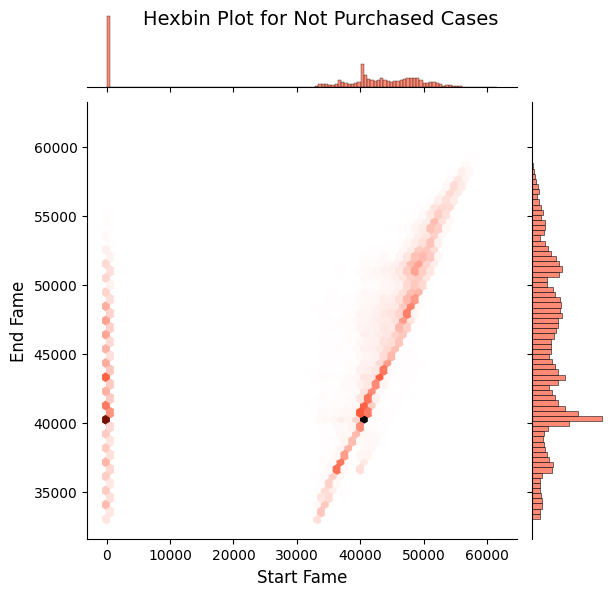

In [22]:
# 패키지 구매x
purchase_false = infos[infos['purchase'] == False]
purchase_false_hexbin = sns.jointplot(x=purchase_false['0402'], y=purchase_false['0425'], kind='hex', color='tomato')
purchase_false_hexbin.set_axis_labels('Start Fame', 'End Fame', fontsize=12)
purchase_false_hexbin.fig.suptitle('Hexbin Plot for Not Purchased Cases', fontsize=14)

**패키지를 구매하지 않은 유저**
* 많은 수의 유저가 5만 이하의 구간에서 이탈했다.
* 많은 유저들이 이벤트를 달성한 후 바로 이탈하거나, 5.5 이상의 높은 명성에 도달하지 못하고 이탈했다.

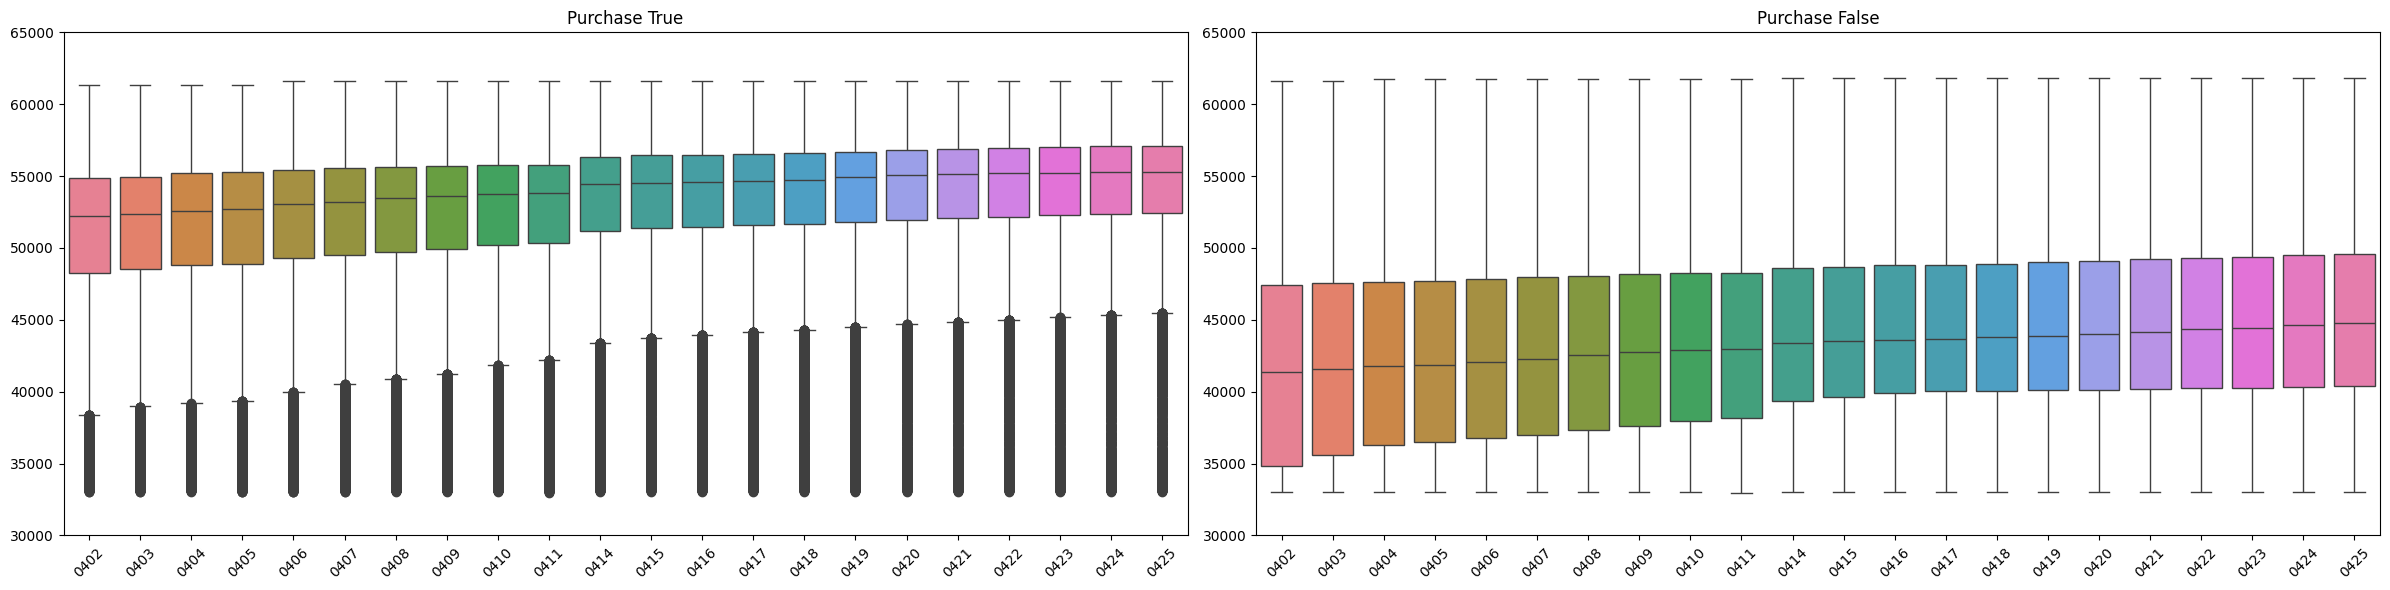

In [23]:
time_columns.sort()
fig,axes = plt.subplots(1,2, figsize=(24,6))

# 구매 한 경우
sns.boxplot(data=purchase_true[time_columns], ax=axes[0])
axes[0].set_title('Purchase True')
axes[0].set_ylim(30000, 65000)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45) 

# 구매 안한 경우
sns.boxplot(data=purchase_false[time_columns], ax=axes[1])
axes[1].set_title('Purchase False')
axes[1].set_ylim(30000, 65000)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45) 

plt.tight_layout()
plt.show()

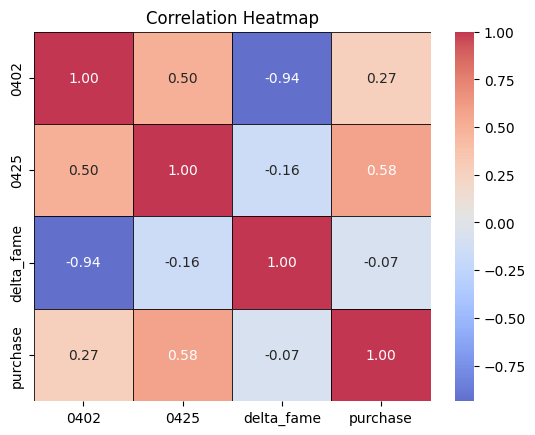

In [24]:
fig,ax = plt.subplots()
sns.heatmap(infos[['0402', '0425', 'delta_fame' ,'purchase']].corr(), annot=True, cmap='coolwarm', alpha=0.8, fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

* 히트맵으로 시작 날짜의 명성, 마지막 날짜의 명성, 명성 변화량, 구매 유무를 시각화했다.
* 시작 날짜가 신규 캐릭터 초기 날짜가 아니라서 초기 명성과 후기 명성이 양의 상관관계를 보인다.
* 후기 명성과 구매 유무는 강한 상관관계를 보여준다.
* 명성 변화량은 해당 날짜에 생성하지 않은 데이터들은 0으로 처리해서 초기 명성, 후기 명성과 굉장히 강한 상관관계를 보인다.

In [25]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(infos['0425'], infos['purchase'])
print(f'상관계수: {correlation_coefficient:.2f}')
print(f'p-value: {p_value:.4f}')
if p_value < 0.05:
    print('마지막 명성과 구매 유무의 유의미한 선형관계 존재')

correlation_coefficient, p_value = pearsonr(infos['delta_fame'], infos['purchase'])
print(f'상관계수: {correlation_coefficient:.2f}')
print(f'p-value: {p_value:.4f}')
if p_value < 0.05:
    print('명성 변화와 구매 유무의 유의미한 선형관계 존재')

상관계수: 0.58
p-value: 0.0000
마지막 명성과 구매 유무의 유의미한 선형관계 존재
상관계수: -0.07
p-value: 0.0000
명성 변화와 구매 유무의 유의미한 선형관계 존재


* 특정 시점에서 고명성인 유저가 패키지를 구매했을 가능성은 당연히 높다.
* 특정 기간 내에 명성 변화량이 크고, 마지막 명성이 크다면 고인물 혹은 과금 유저일 가능성이 높다.
  * 고인물, 과금 유저의 경우에는 `빠른 컨텐츠 고갈로 스펙업의 욕구가 줄어드는 문제점이 존재한다.`
  * 이를 방지하기 위해 `컨텐츠 소모 속도 조절, 경쟁 컨텐츠 개발 등이 필요하다.`
* 패키지를 구매하지 않는 유저들의 `이탈을 방지하기 위해서는 크리처, 칭호, 오라 등 을 제한적으로 지급한다.`
  * 금전적인 여유가 부족한 유저들은 한 번에 많은 종결 아이템 구매가 어려우므로, `종결 아이템을 패스를 통해 하나씩 교체하도록 유도한다.`

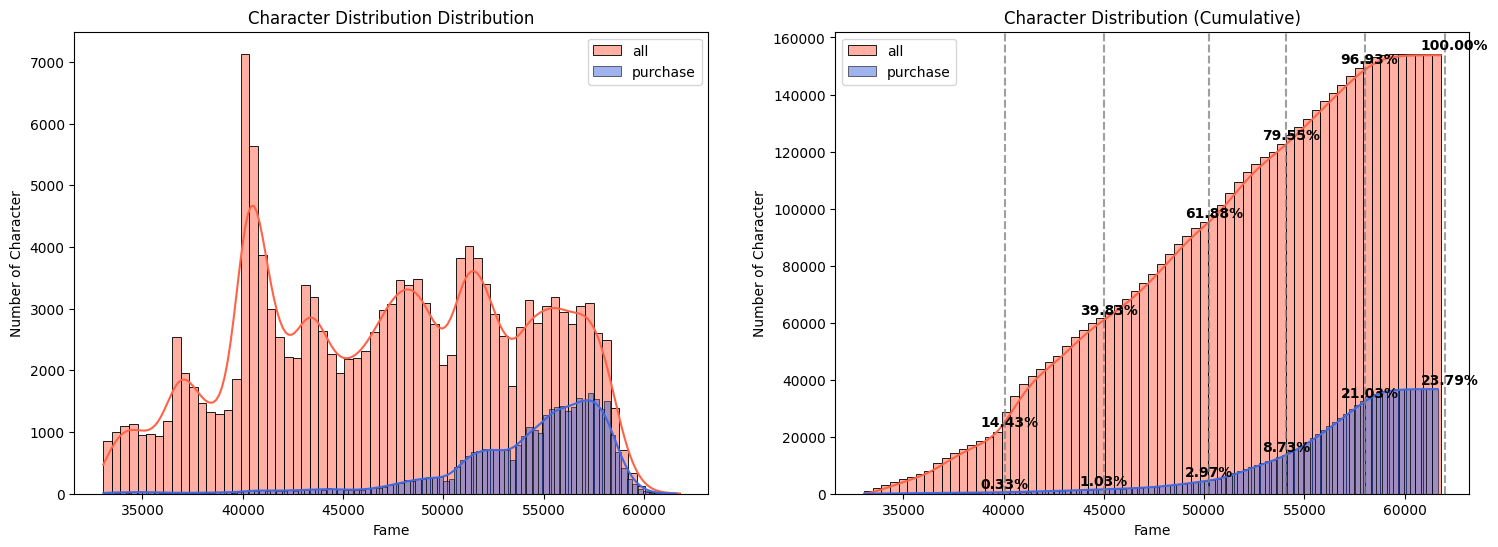

In [26]:
fig,axes = plt.subplots(1,2,figsize=(18,6))

h,_ = infos.shape

# 전체 히스토그램 / 구매자 히스토그램
sns.histplot(data=infos['0425'], kde=True, ax=axes[0], color = 'tomato', label='all')
sns.histplot(data=infos[infos['purchase']==True]['0425'], kde=True, ax=axes[0], color = 'royalblue', label='purchase')
axes[0].set_title('Character Distribution Distribution')
axes[0].set_xlabel('Fame')
axes[0].set_ylabel('Number of Character')
axes[0].legend()

# 전체 누적 히스토그램 / 구매자 누적 히스토그램
sns.histplot(data=infos['0425'], kde=True, cumulative=True, ax=axes[1], color = 'tomato', label='all')
sns.histplot(data=infos[infos['purchase']==True]['0425'], kde=True, cumulative=True, ax=axes[1], color = 'royalblue', label='purchase')

for f in [40047, 45000, 50248, 54098, 58000, 62000]:

    # 전체 분포 비율
    y = len(infos[(infos['0425'] <= f)]) / h
    axes[1].axvline(x=f, linestyle='--', color='gray', alpha=0.5)
    axes[1].text(f-1200, y*h+1500, f'{y*100:.2f}%', weight='bold')

    # 구매자 분포 비율
    y = len(infos[(infos['0425'] <= f) & (infos['purchase'] == True)]) / h
    axes[1].axvline(x=f, linestyle='--', color='gray', alpha=0.5)
    axes[1].text(f-1200, y*h+1500, f'{y*100:.2f}%', weight='bold')
    
axes[1].set_title('Character Distribution (Cumulative)')
axes[1].set_xlabel('Fame')
axes[1].set_ylabel('Number of Character')
axes[1].legend()
plt.show()

* 명성 5.4 이상의 구간(약 상위 20%)의 캐릭터가 구매력이 가장 높은 것을 확인할 수 있다.


### **요약 및 개선사항**
#### **명성에 따른 패키지 분석**
* 플래티넘 타입 패키지의 경우, 고가의 플레티넘 칭호 선택 상자와 레어 무기 클론 아바타를 지급해서 버프 강화 타입에 비해 매출이 높을 것으로 예상된다.
  * 플래티넘 타입 패키지 매출액은 약 11억이다.
* 누적 구매 분포를 보아 `대부분의 유저는 육성 시작 전 부터 패키지를 구매하는 경향을 보인다.`
  * 퀘스트 클리어 후 이탈하는 유저를 막기 위해 단조로운 직업 소개 영상에서 벗어나 `콤보와 컷신 등 다양한 측면에서 유저의 관심을 끌 수 있는 방식을 선택해야 한다.`
  * 또한, 패스 캐릭터로 지정하지 않으면 아바타가 없이 육성하게 되어 굉장히 불편한 상태로 육성을 하게된다.
  * `기간제 아바타 지급`을 통해 쾌적한 플레이로 이탈을 방지하여 `추후에 클론 레어 아바타 구매를 유도해야 한다.`

## **4. 인사이트 & 액션플랜**
* `대부분의 유저들은 금전적, 시간적 여유에 따라 캐릭터 육성 계획을 가지고 있다.`
  * 초기 유입을 늘리고, 초반 이탈을 막는다.
  1. 캐릭터의 스타일을 알 수 없다 → 수련의방 개선을 통해 다양한 콤보 연습, 세팅 연구, 모의 전투 개선 등을 통해 초기 유입을 늘린다.
  2. 기간제 아바타, 준종결 아이템 등을 지급하여 초기유입을 늘린다.
  3. 데미지, 속도 물약, 던전 버프 등을 제공하여 이탈을 막는다.
  4. 철 지난 컨텐츠 구간을 빠르게 스킵 가능한 융합 장비와 성장 재료를 다수 지급한다.

* `플래티넘 패키지 매출의 대부분은 상위 20% 이상에서 나타났다.`
  * 컨텐츠가 많고, 스펙업 욕구가 높은 구간에 많은 캐릭터들을 머물게 한다.
  1. 인구수가 많은 구간임을 빼고 봐도, 플레이 가능한 컨텐츠도 많고 스펙업 욕구가 높은 구간이다.
  2. 이 구간 이전의 캐릭터들을 빠르게 성장시켜 이 구간에 들어올 수 있게 하는 성장 지원 이벤트 개선이 필요하다.
  3. 현재와 같이 이벤트 캐릭터를 육성시켜 중재자, 서고 등의 입장 재료를 얻고 계정 귀속으로 본 캐릭터를 성장시키는 방식은 유지하되, 이벤트 캐릭터에 지급하는 양을 늘려서 육성 흐름이 끊기지 않게 한다. (평일 컨텐츠 전무)